Box Office Movie Data Analytics with Python

In [301]:
#pip install matplotlib

In [302]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Prepare the Data

## Import

In [303]:
rd= pd.read_csv("data\movies.csv")
pd.options.display.max_columns = None
display(rd)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [304]:
rd.head()
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Explore 

In [305]:
print("rd type:", type(rd))
print("rd shape:", rd.shape)
print("rd info:", rd.info())
rd.head()

rd type: <class 'pandas.core.frame.DataFrame'>
rd shape: (7668, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
rd info: None


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [306]:
df.head()

,genre,score,votes,country,budget,gross
5445,Action,7.8,1100000.0,United States,237000000.0,2.847246e+09
7445,Action,8.4,903000.0,United States,356000000.0,2.797501e+09
3045,Drama,7.8,1100000.0,United States,200000000.0,2.201647e+09
6663,Action,7.8,876000.0,United States,245000000.0,2.069522e+09
7244,Action,8.4,897000.0,United States,321000000.0,2.048360e+09


In [307]:
# Find Nan or missing values 
rd.isnull().sum()

# df = df.dropna()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [308]:
for col in rd.columns:
    pct_missing = np.mean(rd[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [309]:
rd.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [310]:
# check the data types of the columns 

rd.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

check corelation between the diferent data types

In [311]:
# transform the object data types to numerical for easy computation

rd_numerized = rd

for col_name in rd_numerized.columns:
    if(rd_numerized[col_name].dtype == "object"):
        rd_numerized[col_name] = rd_numerized[col_name].astype("category")
        rd_numerized[col_name]= rd_numerized[col_name].cat.codes
        
rd_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


<Axes: >

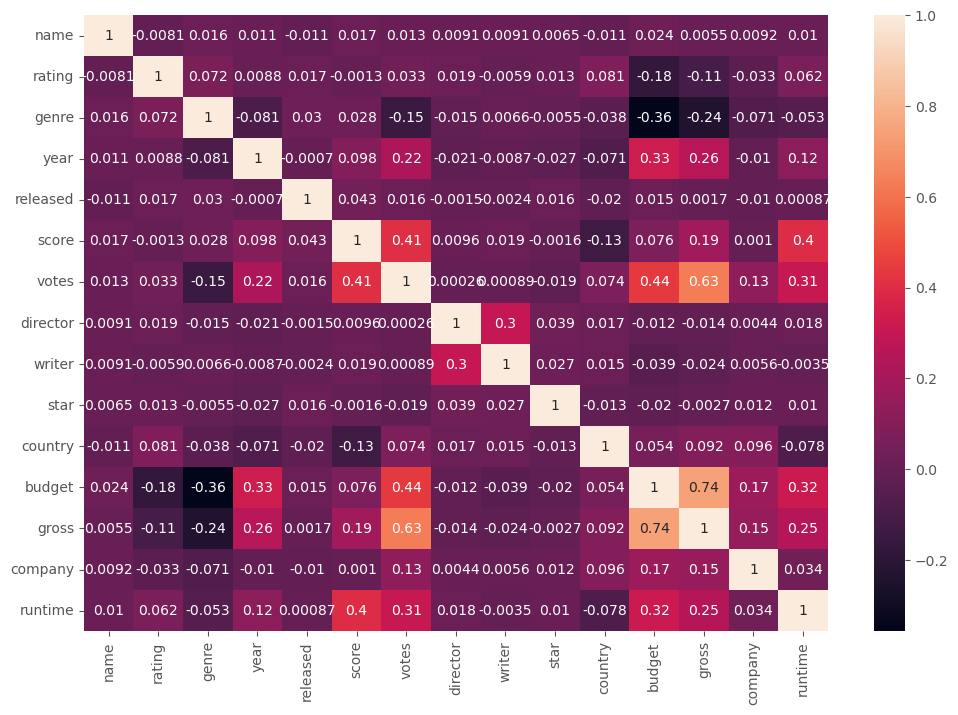

In [312]:
correlation_matrix= rd_numerized.corr(method= "pearson", numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

In [313]:
rd_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


In [314]:
# An easier view of columns with corelations
correlation_mat= rd_numerized.corr()

corr_pairs= correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [315]:
#sort pairs with high colleration 
sorted_pairs= corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs)> 0.4]
high_corr

score     votes       0.409182
votes     score       0.409182
budget    votes       0.442429
votes     budget      0.442429
gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

The data contains null values,values with wrong data types, and irellevant data columns for our research topic

Theres high corelation between "budget" vs "gross", and "votes" vs "gross"

# Data Cleaning

Create a function to help process and Clean the data into 

In [347]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)

    mask_price = df["gross"] > 100_000_000
    df = df[ mask_price]
    
    #clean data to ensure the released date and year arecorrect with a new column based on release date
    df["year_correct"]= df["released"].str.replace(r'\(.*\)', '', regex=True).str.split(',').str[1].str.strip()
    
    # Remove columns with low collinearity and focus on research question
    df.drop(columns=["runtime", "released", "year", "name", "writer", "star"], inplace=True)
    
    #Remove columns with loe and high cardinality 
    df.drop(columns = ["rating", "director", "company", "year_correct", "country","genre", "score", "votes" ], inplace=True)
    
    #drop null values 
    df.dropna(inplace=True)
    
    return df

In [354]:
df = wrangle("data\movies.csv")
print(df .info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1492 entries, 2 to 7652
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   budget  1492 non-null   float64
 1   gross   1492 non-null   float64
dtypes: float64(2)
memory usage: 35.0 KB
None


,budget,gross
2,18000000.0,538375067.0
6,27000000.0,115229890.0
8,54000000.0,108185706.0
17,10000000.0,103300686.0
92,18000000.0,389925971.0


In [318]:
# changing data type of columns
# df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
# df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

Drop columns not relevant to our data research "runtime", "released" and add to function

In [319]:
#df.drop(columns=["runtime", "released", "year"], inplace=True)

In [320]:
# Get value counts of " " column to determine their viability for defining data results
# df["country"].value_counts().head(30)

country
United States           1263
United Kingdom           104
Germany                   24
France                    21
Canada                    20
China                     15
Japan                     10
Australia                  8
New Zealand                7
Spain                      5
Hong Kong                  3
South Africa               3
Finland                    2
Taiwan                     1
Italy                      1
Sweden                     1
United Arab Emirates       1
Malta                      1
South Korea                1
Denmark                    1
Name: count, dtype: int64

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1492 entries, 2 to 7652
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   genre    1492 non-null   object 
 1   score    1492 non-null   float64
 2   votes    1492 non-null   float64
 3   country  1492 non-null   object 
 4   budget   1492 non-null   float64
 5   gross    1492 non-null   float64
dtypes: float64(4), object(2)
memory usage: 81.6+ KB


In [322]:
df.tail()

,genre,score,votes,country,budget,gross
7648,Action,6.6,140000.0,United States,90000000.0,426505244.0
7649,Action,6.5,102000.0,United States,85000000.0,319715683.0
7650,Adventure,5.6,53000.0,United States,175000000.0,245487753.0
7651,Adventure,6.8,42000.0,Canada,135000000.0,111105497.0
7652,Action,6.8,3700.0,China,80000000.0,461421559.0


In [323]:
df = df.sort_values (by=["gross"], inplace=False, ascending=False)

In [324]:
# check for and drop duplicates
#df["company"].drop_duplicates().sort_values(ascending=False)

# df.drop_duplicates()

The data doesn't have any duplicates

In [325]:
# Budget high correlation 
#company high correlaton 

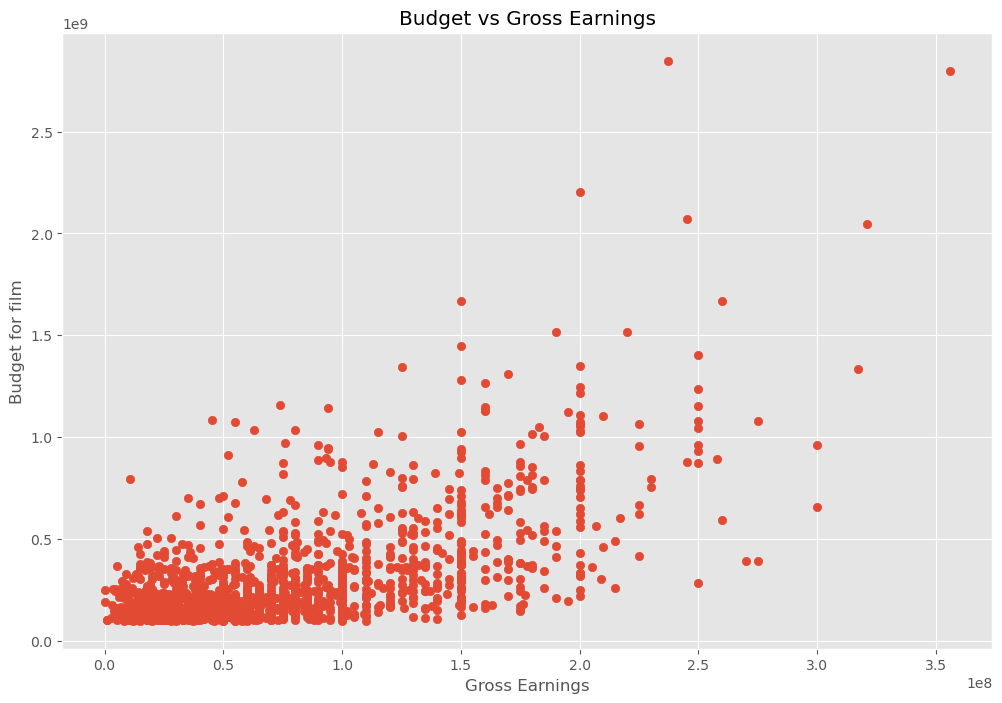

In [326]:
#pot a scatter plot with budget vs gross

plt.scatter(x=df["budget"], y=df["gross"])

plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget for film");

In [327]:
df.head()

,genre,score,votes,country,budget,gross
5445,Action,7.8,1100000.0,United States,237000000.0,2.847246e+09
7445,Action,8.4,903000.0,United States,356000000.0,2.797501e+09
3045,Drama,7.8,1100000.0,United States,200000000.0,2.201647e+09
6663,Action,7.8,876000.0,United States,245000000.0,2.069522e+09
7244,Action,8.4,897000.0,United States,321000000.0,2.048360e+09


<Axes: xlabel='budget', ylabel='gross'>

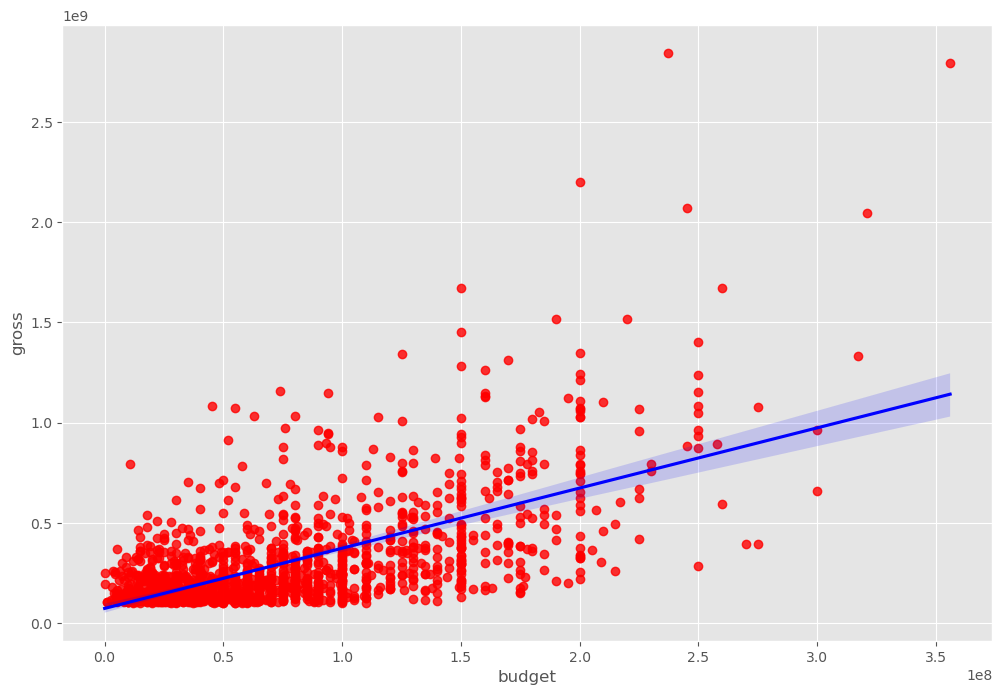

In [328]:
# plot budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

the graph shows the budget and gross are corelated 

In [329]:
# lets check if these data are corelated
df.corr(numeric_only=True)

,score,votes,budget,gross
score,1.000000,0.638967,0.015420,0.263220
votes,0.638967,1.000000,0.244184,0.487485
budget,0.015420,0.244184,1.000000,0.627223
gross,0.263220,0.487485,0.627223,1.000000


<Axes: >

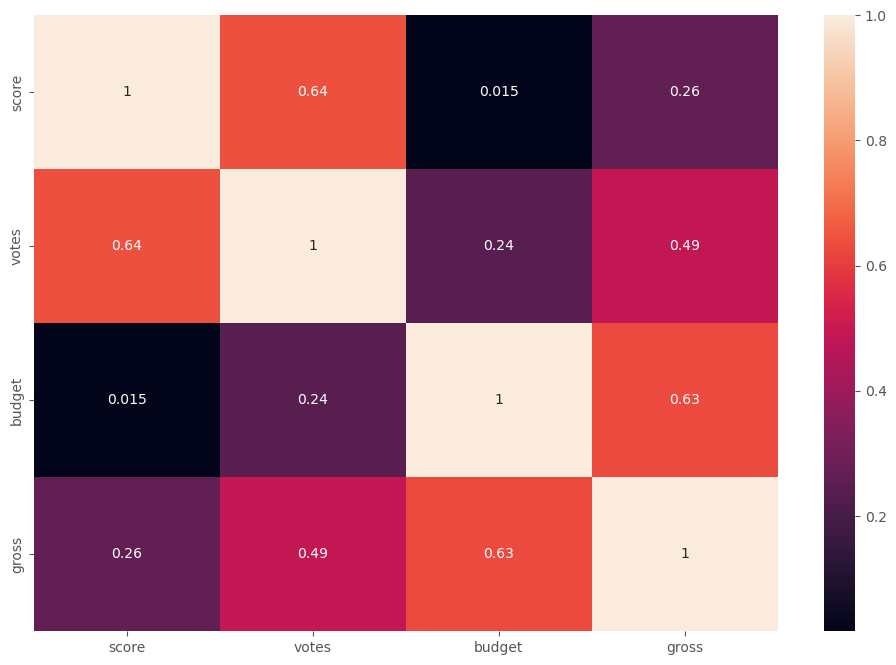

In [330]:
correlation_matrix= df.corr(method= "pearson", numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)



Theres high collinearity between "budget" and "gross" column values upto a value of 0.6 which is good

theres also a corelation between votes and score also a slightly average corellation between "gross" and "votes

In [331]:
# looking for features with low and high cardinality 
df.select_dtypes("object").nunique()

genre      13
country    20
dtype: int64

Modify the wrangle function to elimnate columns "director", "company", "year_correct" and "rating" 
almost every row has its own category or low influence which may affect the data

In [332]:
#df.drop(columns = ["rating", "director", "company", "year_correct"], inplace=True)

## Split Data

In [371]:
sorted(df.columns)

['budget', 'gross']

In [355]:
# we have the target "gross" to train our model, should be one dimensional
target = "gross"

y = df[target]
X = df.drop(columns=target)

In [356]:
cutoff = int(len(X) * 0.8)

X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [357]:
len(X_train) + len(X_test) ==len(X)

True

# Build Model

## Baseline

this will help us know if the model is working as expected

In [358]:
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Budget:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Budget: 279132165.5
Baseline MAE: 154395245.58


We can determine how our baseline performs with a scatter plot 

In [359]:
X_train.values[:5]

array([[18000000.],
       [27000000.],
       [54000000.],
       [10000000.],
       [18000000.]])

In [370]:
print(X_train.shape)

print(y_train.shape)

(1193, 1)
(1193,)


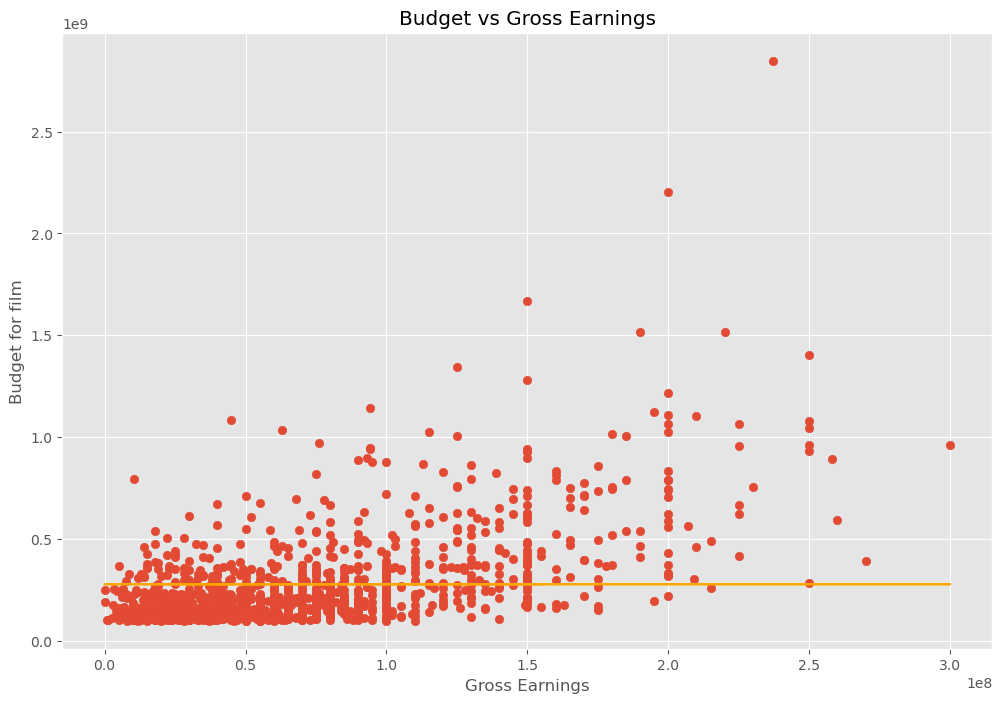

In [369]:
plt.plot(X_train, y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(X_train, y_train)
#plt.scatter(x=df["budget"], y=df["gross"])

plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget for film");

Calculating the baseline mean absolute error for predictions in y_pred_baseline as compared to the true targets in y

## Iterate 

This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance.

In [361]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# model = LinearRegression()

In [ ]:
Fitting the model to the data, X_train and y_train

In [ ]:
# model.fit(X_train, y_train)

## Evaluate

This is the final step

In [362]:
# create a list of predictions for the observations in feature matrix X_train
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([1.25611310e+08, 1.52664600e+08, 2.33824469e+08, 1.01563942e+08,
       1.25611310e+08])

Calculating training mean absolute error for predictions in y_pred_training as compared to the true targets in y_train.

In [ ]:
# mae_training = mean_absolute_error(y_train, y_pred_training)
# print("Training MAE:", round(mae_training, 2))

In [363]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 126425297.45
Test MAE: 173601710.09


Our training model beat the baseline by over $20,000,000! thats a good show of the models potential to help us with the predictions. However the model didn't perform well with the test data. 

# Communicate Results 

In [364]:
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 71504731.08


In [365]:
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "budget":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "budget": 3.01


In [366]:
print(f"gross= {intercept} + {coefficient} * budget")

gross= 71504731.08 + 3.01 * budget


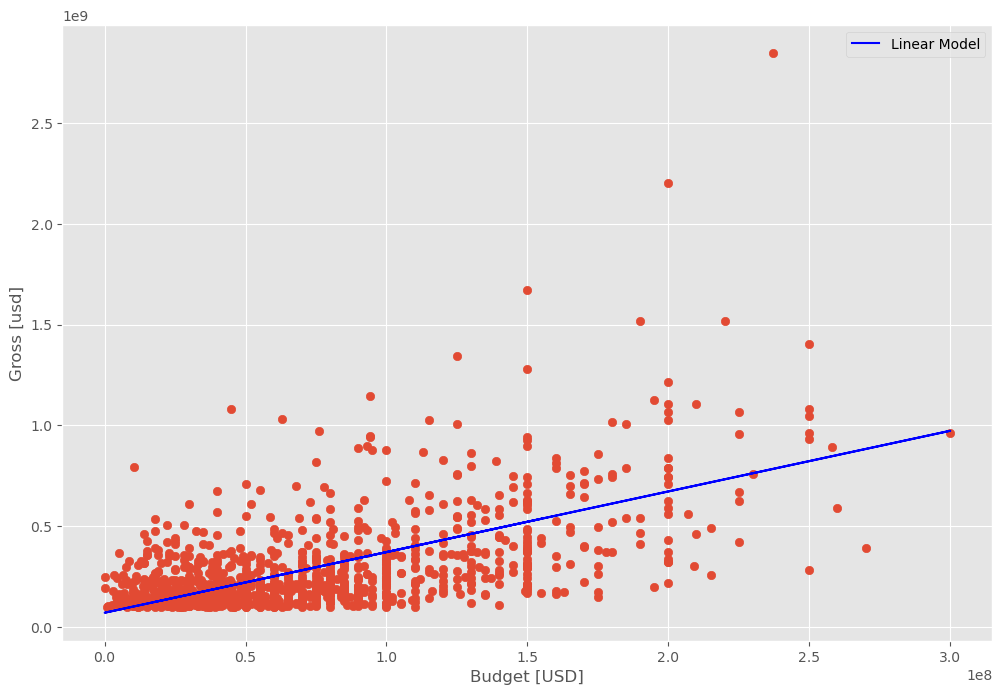

In [368]:
plt.plot(X_train.values, model.predict(X_train), color="blue", label = "Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("Budget [USD]")
plt.ylabel("Gross [usd]")
plt.legend();